# Data analysis and modeling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib

In [2]:
# Unimportant plotting parameters
matplotlib.font_manager._rebuild()
plt.rcParams['font.family'] = 'Roboto'
plt.rcParams['font.sans-serif'] = 'Roboto'
plt.rcParams['font.weight'] = 'normal'

### Step 1: import Value of Statistical Life VSL data

In [3]:
data = pd.read_csv('data_vsl.csv', sep=';', encoding='utf-8', index_col=None, thousands=',')

In [4]:
data

,Paper,Biblio. Ref.,No. Obs.,Publication Year,Country,Mean VSL (dollar 2005),Range (M de dollar 2005),Per capita VSL/GDP ratio
0,ADB,[6],4,2005,Malaysia,1194228,0.7 - 1.7,104.0
1,Alberini & Chiabai,[1],7,2006,Italy,2701947,1 - 5.6,97.0
2,Alberini & Kahn,[8],12,2006,United States,1266037,0.2 - 6.4,30.0
3,Alberini et al.,[3],11,2006,Czech Republic,2965895,0.7 - 5.4,146.0
4,Alberini et al.,[2],2,2004,United States,1421025,1.1 - 1.7,34.0
5,Alberini et al.,[4],3,2007,Italy,3598485,1.4 - 6.3,130.0
6,Alberini et al.,[5],2,2006,Canada,1036062,0.8 - 1.2,27.0
7,Alberini et al.,[5],2,2006,United States,1036062,0.8 - 1.2,27.0
8,Benkhalifa,[XX],XX,2010,Tunisia,149000,NaN,NaN
9,"Buzby, Ready & Skees",[7],2,1995,United States,6521801,5.4 - 7.6,156.0


### Step 2: import HCI data and combine them with VSL data.

In [5]:
hci = pd.read_csv('data_hci.csv', sep=';', encoding='utf-8', index_col=None, decimal=",")

In [6]:
hci

,Country Name,WB Code,Region,Income Group,Probability of Survival to Age 5,Expected Years of School,Harmonized Test Scores,Learning-Adjusted Years of School,Fraction of Kids Under 5 Not Stunted,Adult Survival Rate,HUMAN CAPITAL INDEX (LOWER BOUND),HUMAN CAPITAL INDEX,HUMAN CAPITAL INDEX (UPPER BOUND),"GDP per capita (WB, 2017)"
0,Afghanistan,AFG,South Asia,Low income,0.93,8.6,355,4.9,0.59,0.78,0.38,0.39,0.40,NaN
1,Albania,ALB,Europe & Central Asia,Upper middle income,0.99,13.0,429,8.9,0.77,0.94,0.61,0.62,0.63,NaN
2,Algeria,DZA,Middle East & North Africa,Upper middle income,0.98,11.4,374,6.8,0.88,0.91,0.51,0.52,0.53,15275.0
3,Angola,AGO,Sub-Saharan Africa,Lower middle income,0.92,7.9,326,4.1,0.62,0.76,0.33,0.36,0.39,NaN
4,Argentina,ARG,Latin America & Caribbean,Upper middle income,0.99,13.1,424,8.9,NaN,0.89,0.60,0.61,0.62,NaN
5,Armenia,ARM,Europe & Central Asia,Lower middle income,0.99,11.1,443,7.9,0.91,0.88,0.56,0.57,0.58,NaN
6,Australia,AUS,East Asia & Pacific,High income,1.00,13.8,524,11.6,0.98,0.95,0.79,0.80,0.81,NaN
7,Austria,AUT,Europe & Central Asia,High income,1.00,13.9,525,11.7,NaN,0.94,0.78,0.79,0.80,52558.0
8,Azerbaijan,AZE,Europe & Central Asia,Upper middle income,0.98,11.6,472,8.7,0.82,0.87,0.58,0.60,0.62,NaN
9,Bahrain,BHR,Middle East & North Africa,High income,0.99,13.3,452,9.6,NaN,0.93,0.65,0.67,0.68,NaN


In [7]:
for i, row in data.iterrows():
    country = hci[hci['Country Name'] == row['Country']]
    data.loc[i, 'HCI'] = country['HUMAN CAPITAL INDEX'].values[0]
    data.loc[i, 'Region'] = country['Region'].values[0]
    data.loc[i, 'Income Group'] = country['Income Group'].values[0]
    data.loc[i, 'Proba Age 5'] = country['Probability of Survival to Age 5'].values[0]
    data.loc[i, 'Learning-adjusted schooling'] = country['Learning-Adjusted Years of School'].values[0]
    data.loc[i, 'Kids not stunted'] = country['Fraction of Kids Under 5 Not Stunted'].values[0]
    data.loc[i, 'Adult Survival Rate'] = country['Adult Survival Rate'].values[0]
    data.loc[i, 'GDP per capita'] = country['GDP per capita (WB, 2017)'].values[0] / 10000
# data = pd.concat([data, pd.get_dummies(data['Region'], prefix="dummy")], axis=1, sort=False)
# data = pd.concat([data, pd.get_dummies(data['Income Group'], prefix="dummy")], axis=1, sort=False)

In [8]:
# Tryouts with keeping only the most recent data of each country. Not kept.
idx = data.groupby(['Country'])['Publication Year'].transform(max) == data['Publication Year']
data['intercept'] = 1
# data = data[idx]

### First model: regress VCL on HCI

In [9]:
x = data[['intercept', 'HCI']].astype(float)
y = np.log(data['Mean VSL (dollar 2005)'])

In [10]:
model_1 = sm.OLS(y, x).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Mean VSL (dollar 2005)   R-squared:                       0.352
Model:                                OLS   Adj. R-squared:                  0.336
Method:                     Least Squares   F-statistic:                     22.27
Date:                    Sun, 07 Apr 2019   Prob (F-statistic):           2.75e-05
Time:                            15:57:51   Log-Likelihood:                -70.651
No. Observations:                      43   AIC:                             145.3
Df Residuals:                          41   BIC:                             148.8
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      8.7310      1.172      7.447      0.000       6.363      11.099
HCI            7.6840      1.628      4.720      0.000       4.396      10.972
==============================================================================
Omnibus:                       14.272   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.143
Skew:                          -1.048   Prob(JB):                     0.000115
Kurtosis:                       5.394   Cond. No.                         12.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

[]

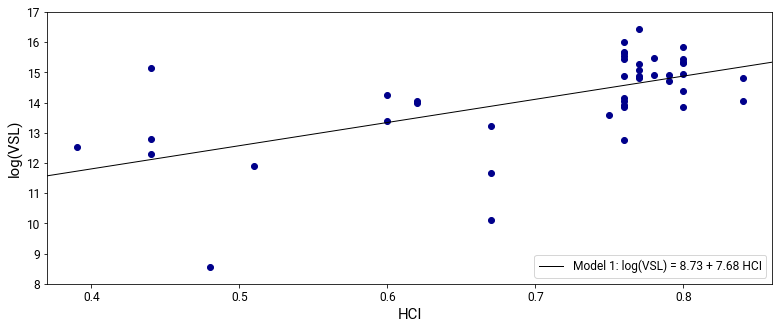

In [11]:
params = model_1.params.values
rangex = np.array([data['HCI'].min() - 0.02, data['HCI'].max() + 0.02])
rangey = np.array([int(y.min() - .5), int(y.max() + 1.5)])
fig, ax = plt.subplots(figsize=(13,5))
ax.scatter(data['HCI'], np.log(data['Mean VSL (dollar 2005)']), color='darkblue', label=None)
ax.plot(rangex, params[0] + rangex * params[1], color='black', linewidth=1,
        label="Model 1: log(VSL) = 8.73 + 7.68 HCI")
ax.set_xlim(rangex)
ax.set_ylim(rangey)
ax.tick_params(labelsize=12)
ax.set_xlabel('HCI',size=15)
ax.set_ylabel('log(VSL)',size=15)
ax.legend(loc='lower right', fontsize=12)
plt.savefig("../Model1.png", bbox_inches='tight',format="png", dpi=300, transparent=True)
plt.plot()

## Second model: regress VCL on GDP per capita

In [12]:
x = data[['intercept', 'GDP per capita']].astype(float)
y = np.log(data['Mean VSL (dollar 2005)'])

In [13]:
model_2 = sm.OLS(y, x).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Mean VSL (dollar 2005)   R-squared:                       0.465
Model:                                OLS   Adj. R-squared:                  0.452
Method:                     Least Squares   F-statistic:                     35.66
Date:                    Sun, 07 Apr 2019   Prob (F-statistic):           4.75e-07
Time:                            15:57:51   Log-Likelihood:                -66.524
No. Observations:                      43   AIC:                             137.0
Df Residuals:                          41   BIC:                             140.6
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept         11.9236      0.418     28.492      0.000      11.078      12.769
GDP per capita     0.5767      0.097      5.972      0.000       0.382       0.772
==============================================================================
Omnibus:                       12.237   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.820
Skew:                          -0.968   Prob(JB):                     0.000998
Kurtosis:                       4.992   Cond. No.                         10.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

[]

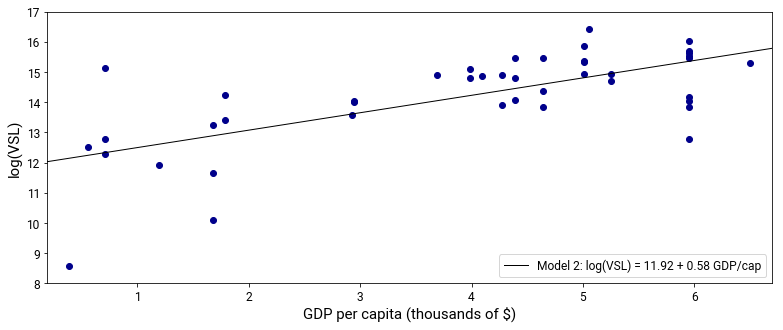

In [14]:
params = model_2.params.values
rangex = np.array([data['GDP per capita'].min() - 0.2, data['GDP per capita'].max() + 0.2])
rangey = np.array([int(y.min() - .5), int(y.max() + 1.5)])
fig, ax = plt.subplots(figsize=(13,5))
ax.scatter(data['GDP per capita'], y, color='darkblue', label=None)
ax.plot(rangex, params[0] + rangex * params[1], color='black', linewidth=1,
        label="Model 2: log(VSL) = 11.92 + 0.58 GDP/cap")
ax.set_xlim(rangex)
ax.set_ylim(rangey)
ax.tick_params(labelsize=12)
ax.set_xlabel('GDP per capita (thousands of $)',size=15)
ax.set_ylabel('log(VSL)',size=15)
ax.legend(loc='lower right', fontsize=12)
plt.savefig("../Model2.png", bbox_inches='tight',format="png", dpi=300, transparent=True)
plt.plot()

### Third model: regress VCL on HCI + GDP

In [15]:
X = data[['intercept', 'GDP per capita', 'HCI']].astype(float)
y = np.log(data['Mean VSL (dollar 2005)'])

In [16]:
model_3 = sm.OLS(y, X).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Mean VSL (dollar 2005)   R-squared:                       0.466
Model:                                OLS   Adj. R-squared:                  0.439
Method:                     Least Squares   F-statistic:                     17.45
Date:                    Sun, 07 Apr 2019   Prob (F-statistic):           3.56e-06
Time:                            15:57:52   Log-Likelihood:                -66.492
No. Observations:                      43   AIC:                             139.0
Df Residuals:                          40   BIC:                             144.3
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept         11.5807      1.453      7.968      0.000       8.643      14.518
GDP per capita     0.5382      0.184      2.922      0.006       0.166       0.911
HCI                0.6957      2.821      0.247      0.806      -5.006       6.398
==============================================================================
Omnibus:                       12.074   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.826
Skew:                          -0.941   Prob(JB):                     0.000995
Kurtosis:                       5.043   Cond. No.                         78.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Fourth model: decomposing the components of HCI + GDP (placebo model)

In [17]:
base = ['intercept', 'GDP per capita']
sub = ['Proba Age 5', 'Learning-adjusted schooling', 'Adult Survival Rate']
X = data[base + sub].astype(float)
y = np.log(data['Mean VSL (dollar 2005)'])

In [18]:
model_4 = sm.OLS(y, X).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Mean VSL (dollar 2005)   R-squared:                       0.472
Model:                                OLS   Adj. R-squared:                  0.416
Method:                     Least Squares   F-statistic:                     8.482
Date:                    Sun, 07 Apr 2019   Prob (F-statistic):           5.41e-05
Time:                            15:57:52   Log-Likelihood:                -66.261
No. Observations:                      43   AIC:                             142.5
Df Residuals:                          38   BIC:                             151.3
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
intercept                      12.6838     24.588      0.516      0.609     -37.093      62.460
GDP per capita                  0.5057      0.198      2.555      0.015       0.105       0.906
Proba Age 5                     3.3298     27.074      0.123      0.903     -51.478      58.138
Learning-adjusted schooling     0.1351      0.302      0.448      0.657      -0.475       0.746
Adult Survival Rate            -5.6780      9.357     -0.607      0.548     -24.619      13.263
==============================================================================
Omnibus:                       11.860   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               13.191
Skew:                          -0.946   Prob(JB):                      0.00137
Kurtosis:                       4.944   Cond. No.                     2.25e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.25e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""